https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/

# Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

In [4]:
PATH = 'data/nyc-taxi/'

The entire dataset has about 55,423,856 rows

# Load clean dataframe

In [38]:
%%time
train_df = pd.read_feather('tmp/v2/taxi-v2-train')
val_df = pd.read_feather('tmp/v2/taxi-v2-val')

Wall time: 109 ms


In [39]:
%%time
X_train, y_train, _ = proc_df(train_df,'fare_amount') 

Wall time: 1.11 s


In [40]:
X_val, y_val, _ = proc_df(val_df,'fare_amount')

In [41]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3445082, 16), (9674, 16), (3445082,), (9674,))

# Train on training

Full Sample

| NUM TREES  | RMSE FULL | FI FULL | MAXFEAT SQRT FULL | 
|---|---|---|---|
| 10 | 3.17810 | 3.18312 |---|
| 20 | 3.10469 | 3.13089 |---|
| 40 | 3.07459 | 3.10923 | 3.29178 |
| 80 | 3.05548 |---| 3.28637 |
| 160 | **3.05006** |---| 3.26901 |

Subsample (40,000)

| NUM TREES | RMSE SUB | RMV DIST |FI | MIN 1LEAF | MIN 5LEAF | MAXFEAT SQRT | MAXFEAT 0.6 |
|---|---|---|---|---|---|---|---|
| 10 | 3.32849 | 3.35876 | 3.34315 | 3.47438 | 3.34187 | 3.51720 | 3.33512 |
| 20 | 3.27289 | 3.28881 | 3.29936 | 3.36459 | 3.28026 | 3.40769 | 3.26151 |
| 40 | 3.24416 | 3.26598 | 3.25810 | 3.31264 | 3.26485 | 3.37125 | 3.23247 |
| 80 | 3.24484 |---|---|---|---| 3.35322 | 3.23091 |
| 160 | 3.23656 |---|---|---|---|---|---|


## Helper functions

In [42]:
seed = 42

In [43]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):  
    
    # in scikit-learn, random forest regressor,score is the r-squared value
    train_scr = m.score(X_train, y_train)
    val_scr = m.score(X_val, y_val)
    
    # RMSE is what we are more interested in
    train_rmse = rmse(m.predict(X_train), y_train)
    val_rmse = rmse(m.predict(X_val), y_val)
    if hasattr(m, 'oob_score_'): oob_scr = m.oob_score_
        
    res = f"Training-Score:   {train_scr:.5f}\tTraining-rmse:   {train_rmse:.5f}\n"
    res += f"Validation-score: {val_scr:.5f}\tValidation-rmse: {val_rmse:.5f}"   
    if hasattr(m, 'oob_score_'): res += f"\nOOB-score:\t  {oob_scr:.5f}"
        
    print(res)

In [44]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

## Train Baseline - Full Sample

In [12]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

C:\Users\szelee\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training-Score:   0.94438	Training-rmse:   2.21004
Validation-score: 0.88057	Validation-rmse: 3.17810
OOB-score:	  0.82460
Wall time: 2min 20s


In [13]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

C:\Users\szelee\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training-Score:   0.94744	Training-rmse:   2.14837
Validation-score: 0.88602	Validation-rmse: 3.10469
OOB-score:	  0.86287
Wall time: 4min 48s


In [14]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.94900	Training-rmse:   2.11625
Validation-score: 0.88822	Validation-rmse: 3.07459
OOB-score:	  0.86999
Wall time: 9min 24s


In [12]:
%%time 
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.5, 
                          oob_score=False, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.94985	Training-rmse:   2.09860
Validation-score: 0.88961	Validation-rmse: 3.05548
Wall time: 16min 48s


In [13]:
%%time 
m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.5, 
                          oob_score=False, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.95027	Training-rmse:   2.08971
Validation-score: 0.89000	Validation-rmse: 3.05006
Wall time: 33min 25s


## Train Baseline - Subsample

In [48]:
set_rf_samples(40_000)

In [34]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84693	Training-rmse:   3.66633
Validation-score: 0.86900	Validation-rmse: 3.32849
OOB-score:	  0.84480
Wall time: 13.8 s


In [17]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85259	Training-rmse:   3.59784
Validation-score: 0.87334	Validation-rmse: 3.27289
OOB-score:	  0.85054
Wall time: 33.5 s


In [37]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85514	Training-rmse:   3.56659
Validation-score: 0.87555	Validation-rmse: 3.24416
OOB-score:	  0.85310
Wall time: 48.8 s


In [35]:
%%time 
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85640	Training-rmse:   3.55113
Validation-score: 0.87550	Validation-rmse: 3.24484
OOB-score:	  0.85436
Wall time: 1min 40s


In [36]:
%%time 
m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85697	Training-rmse:   3.54402
Validation-score: 0.87614	Validation-rmse: 3.23656
OOB-score:	  0.85494
Wall time: 3min 58s


## Removing simple distance column

No improvements

In [22]:
X_train.drop('simple_distance', axis=1, inplace=True)
X_val.drop('simple_distance', axis=1, inplace=True)

In [22]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84642	Training-rmse:   3.67248
Validation-score: 0.86661	Validation-rmse: 3.35876
OOB-score:	  0.84429
Wall time: 16.1 s


In [23]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85198	Training-rmse:   3.60532
Validation-score: 0.87210	Validation-rmse: 3.28881
OOB-score:	  0.84996
Wall time: 34 s


In [24]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85488	Training-rmse:   3.56989
Validation-score: 0.87387	Validation-rmse: 3.26598
OOB-score:	  0.85287
Wall time: 52.1 s


## Feature Importance (fi.imp>0.006)

No Improvements

In [44]:
fi = rf_feat_importance(m, X_train)

In [45]:
pd.DataFrame({'cols':X_train.columns, 'imp':m.feature_importances_}).sort_values(by='imp', ascending=False)

,cols,imp
7,simple_distance,0.389153
5,abs_diff_longitude,0.214321
6,abs_diff_latitude,0.208493
2,dropoff_longitude,0.059062
0,pickup_longitude,0.039356
8,pickup_datetimeYear,0.022666
3,dropoff_latitude,0.018112
1,pickup_latitude,0.010227
14,pickup_datetimeHour,0.008640
13,pickup_datetimeDayofyear,0.006794


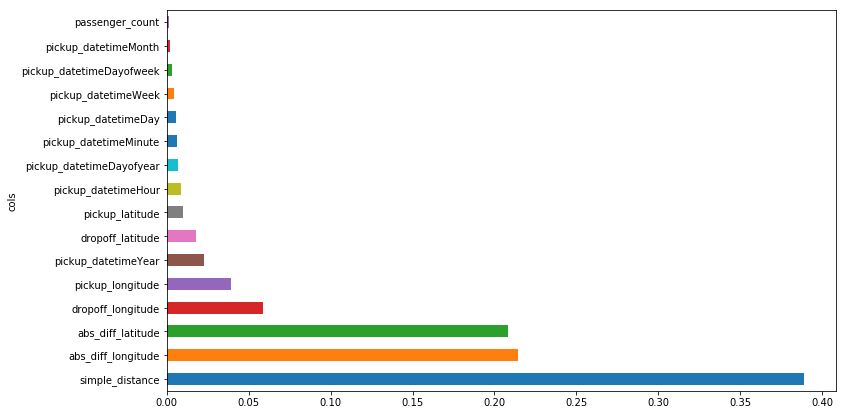

In [46]:
plot_fi(fi)

In [47]:
to_keep = fi[fi.imp>0.006].cols; len(to_keep)

11

In [48]:
to_keep

7              simple_distance
5           abs_diff_longitude
6            abs_diff_latitude
2            dropoff_longitude
0             pickup_longitude
8          pickup_datetimeYear
3             dropoff_latitude
1              pickup_latitude
14         pickup_datetimeHour
13    pickup_datetimeDayofyear
15       pickup_datetimeMinute
Name: cols, dtype: object

In [49]:
X_train = train_df[to_keep].copy()
X_val = val_df[to_keep].copy()

In [24]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84636	Training-rmse:   3.67310
Validation-score: 0.86784	Validation-rmse: 3.34315
OOB-score:	  0.84431
Wall time: 13.3 s


In [25]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85216	Training-rmse:   3.60313
Validation-score: 0.87128	Validation-rmse: 3.29936
OOB-score:	  0.85019
Wall time: 23.9 s


In [26]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85482	Training-rmse:   3.57057
Validation-score: 0.87448	Validation-rmse: 3.25810
OOB-score:	  0.85287
Wall time: 46.7 s


### Full Data

In [50]:
reset_rf_samples()

In [51]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

C:\Users\szelee\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training-Score:   0.94224	Training-rmse:   2.25224
Validation-score: 0.88019	Validation-rmse: 3.18312
OOB-score:	  0.82409
Wall time: 1min 47s


In [52]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

C:\Users\szelee\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training-Score:   0.94524	Training-rmse:   2.19284
Validation-score: 0.88409	Validation-rmse: 3.13089
OOB-score:	  0.86222
Wall time: 4min 6s


In [53]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.94667	Training-rmse:   2.16416
Validation-score: 0.88569	Validation-rmse: 3.10923
OOB-score:	  0.86906
Wall time: 6min 57s


## Min Sample Leaf
No Improvements

### Min Sample Leaf 1

In [46]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=1, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84272	Training-rmse:   3.71641
Validation-score: 0.85727	Validation-rmse: 3.47438
OOB-score:	  0.83927
Wall time: 17 s


In [47]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=1, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85161	Training-rmse:   3.60990
Validation-score: 0.86614	Validation-rmse: 3.36459
OOB-score:	  0.84829
Wall time: 31.9 s


In [48]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85578	Training-rmse:   3.55881
Validation-score: 0.87024	Validation-rmse: 3.31264
OOB-score:	  0.85247
Wall time: 1min 11s


### Min Sample Leaf 5

In [42]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=5, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84688	Training-rmse:   3.66692
Validation-score: 0.86794	Validation-rmse: 3.34187
OOB-score:	  0.84536
Wall time: 12.4 s


In [43]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=5, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85102	Training-rmse:   3.61702
Validation-score: 0.87277	Validation-rmse: 3.28026
OOB-score:	  0.84954
Wall time: 22.7 s


In [44]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85268	Training-rmse:   3.59685
Validation-score: 0.87396	Validation-rmse: 3.26485
OOB-score:	  0.85120
Wall time: 44.6 s


## Max Features (sqrt) 

No Improvements

In [25]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.83841	Training-rmse:   3.76700
Validation-score: 0.85372	Validation-rmse: 3.51720
OOB-score:	  0.83639
Wall time: 13.8 s


In [26]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84433	Training-rmse:   3.69727
Validation-score: 0.86269	Validation-rmse: 3.40769
OOB-score:	  0.84243
Wall time: 29.9 s


In [27]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84694	Training-rmse:   3.66615
Validation-score: 0.86561	Validation-rmse: 3.37125
OOB-score:	  0.84507
Wall time: 1min 5s


In [28]:
%%time 
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84807	Training-rmse:   3.65263
Validation-score: 0.86705	Validation-rmse: 3.35322
OOB-score:	  0.84620
Wall time: 2min 8s


### Full Data

In [45]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85246	Training-rmse:   3.59944
Validation-score: 0.87187	Validation-rmse: 3.29178
OOB-score:	  0.85055
Wall time: 49.3 s


In [46]:
%%time 
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85363	Training-rmse:   3.58523
Validation-score: 0.87229	Validation-rmse: 3.28637
OOB-score:	  0.85171
Wall time: 1min 48s


In [47]:
%%time 
m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features='sqrt', 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85437	Training-rmse:   3.57610
Validation-score: 0.87364	Validation-rmse: 3.26901
OOB-score:	  0.85247
Wall time: 3min 45s


## Max Features

Improvement only on 0.6, not for 0.7, 0.8, 0.9

In [49]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.6, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84703	Training-rmse:   3.66516
Validation-score: 0.86848	Validation-rmse: 3.33512
OOB-score:	  0.84487
Wall time: 14 s


In [50]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.6, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85265	Training-rmse:   3.59718
Validation-score: 0.87422	Validation-rmse: 3.26151
OOB-score:	  0.85059
Wall time: 26.5 s


In [51]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85516	Training-rmse:   3.56644
Validation-score: 0.87645	Validation-rmse: 3.23247
OOB-score:	  0.85311
Wall time: 52.2 s


In [52]:
%%time 
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.6, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85649	Training-rmse:   3.54994
Validation-score: 0.87657	Validation-rmse: 3.23091
OOB-score:	  0.85444
Wall time: 2min 3s


In [73]:
%%time 
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.7, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.84747	Training-rmse:   3.65988
Validation-score: 0.87115	Validation-rmse: 3.30104
OOB-score:	  0.84531
Wall time: 15 s


In [74]:
%%time 
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.7, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85295	Training-rmse:   3.59345
Validation-score: 0.87474	Validation-rmse: 3.25478
OOB-score:	  0.85087
Wall time: 27.2 s


In [75]:
%%time 
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.7, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85539	Training-rmse:   3.56357
Validation-score: 0.87493	Validation-rmse: 3.25227
OOB-score:	  0.85331
Wall time: 53 s


In [76]:
%%time 
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.7, 
                          oob_score=True, random_state=seed, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

Training-Score:   0.85636	Training-rmse:   3.55155
Validation-score: 0.87476	Validation-rmse: 3.25445
OOB-score:	  0.85427
Wall time: 2min 8s


# Predict on test

In [18]:
# We need 'key' for the test submission file
test_df_raw = pd.read_csv(f'{PATH}test.csv', usecols=['key'])

In [19]:
test_df = pd.read_feather('tmp/v2/taxi-test-v2')

In [20]:
# repeat extra processing on training data to test data
# test_df = test_df[to_keep].copy()

In [21]:
test_y_predictions = m.predict(test_df)

# Submit

In [22]:
from datetime import datetime as dt

In [23]:
outdir = 'submissions'
os.makedirs(outdir, exist_ok=True)
    
cur_dt = dt.now().strftime("%Y%m%d_%H%M%S")
desc = 'v05_RF_' # description of submission for reference
subm_fn =  desc + cur_dt + '.csv'
subm_path = f'{outdir}/{subm_fn}'

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df_raw.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv(subm_path, index = False)

subm_path

'submissions/v05_RF_20180731_091034.csv'

| Validation | Leader Board | Specs
| --- | --- | --- |
| 3.08632 | 3.10115 | 11 features, 80 trees, min_samples_leaf=3, max_features=0.5 |
| 3.05006 | 3.08358 | 160 trees, min_samples_leaf=3, max_features=0.5 |

# Save model

In [ ]:
del pruned_train_df

In [ ]:
model_fn_save = 'models/v05_RF_20180729_121842.pkl'

In [ ]:
%time pickle.dump(m, open(model_fn_save, 'wb'))

# Load Model

In [ ]:
model_fn_open = 'models/<>'

In [ ]:
%time m = pickle.load(open(model_fn_open, 'rb'))

# Old Results